In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


In [2]:
# Load the dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add target labels
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# Overall statistics
print("🔢 Statistical Summary:")
df.describe(include='all')


🔢 Statistical Summary:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


🔍 sepal length (cm) → 0 outliers
🔍 sepal width (cm) → 4 outliers
🔍 petal length (cm) → 0 outliers
🔍 petal width (cm) → 0 outliers


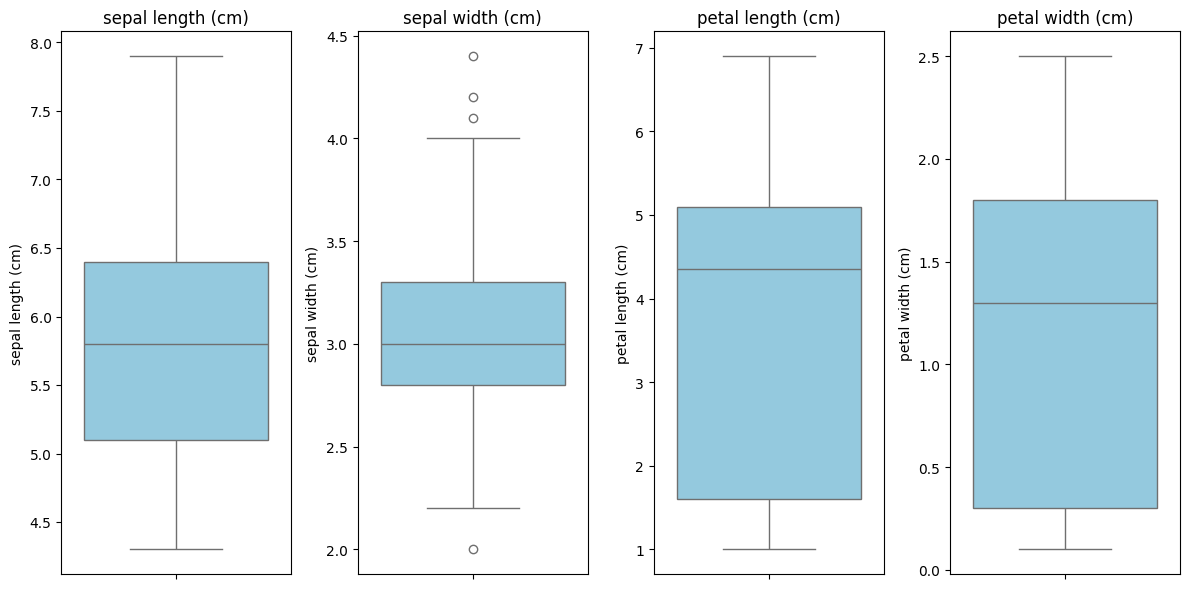

In [4]:
# Detect outliers using IQR
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return outliers

# Check outliers for each feature
features = df.columns[:-1]
for col in features:
    outliers = detect_outliers(col)
    print(f"🔍 {col} → {len(outliers)} outliers")

# Visualize outliers using boxplots
plt.figure(figsize=(12, 6))
for i, col in enumerate(features):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


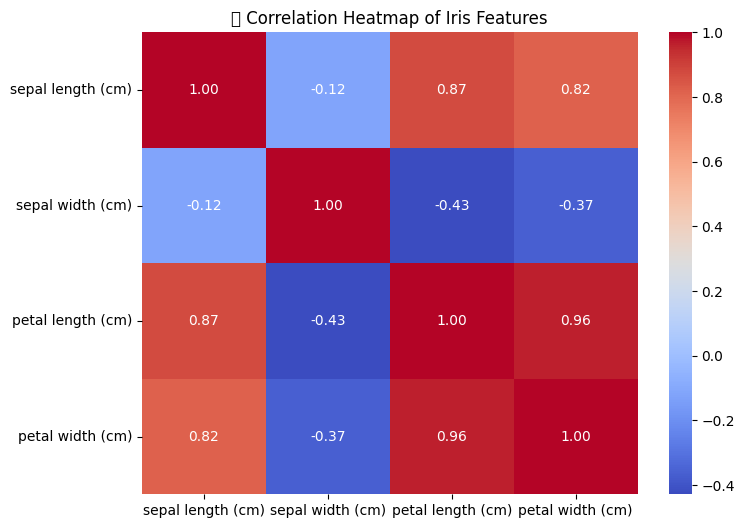

In [5]:
# Correlation matrix
corr = df.drop('species', axis=1).corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔥 Correlation Heatmap of Iris Features")
plt.show()


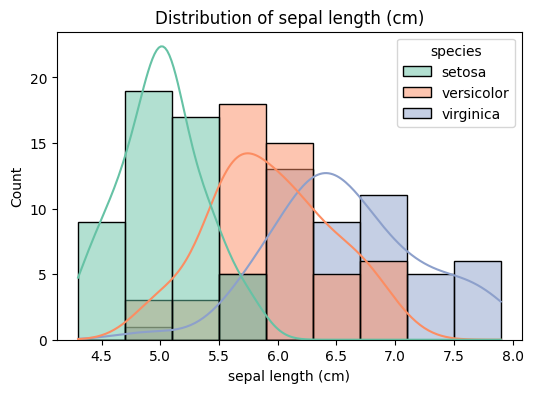

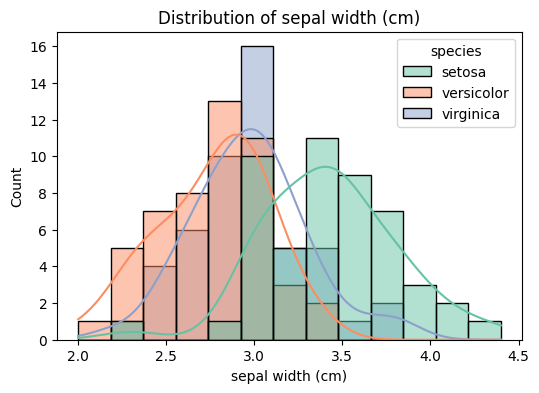

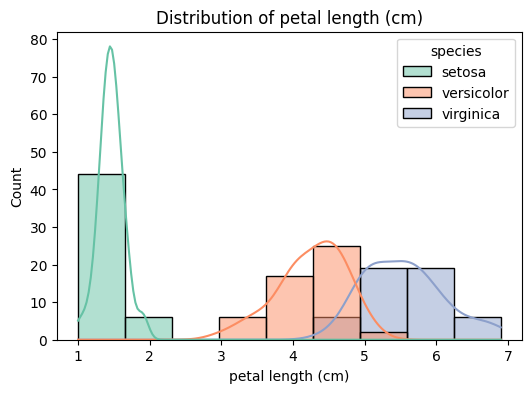

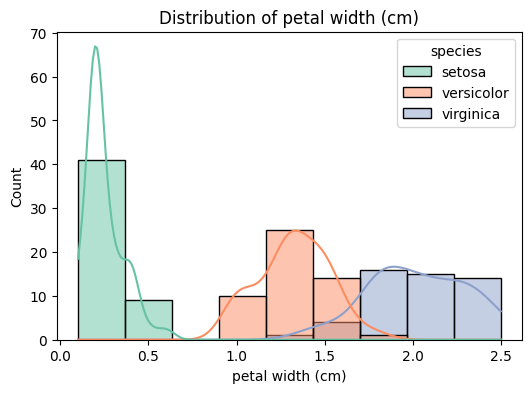

In [6]:
# Histograms grouped by species
for col in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='species', kde=True, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


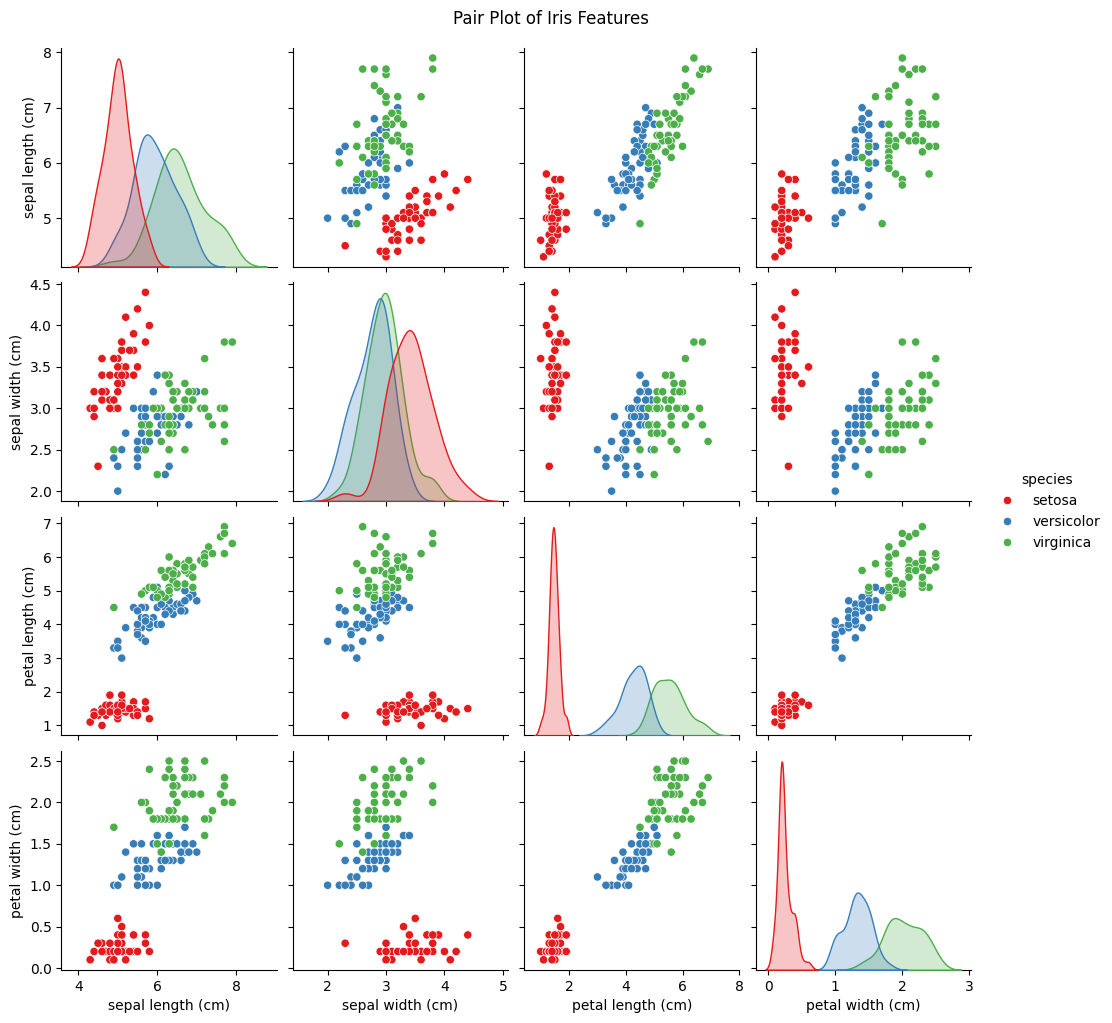

In [7]:
# Pairwise relationships
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle("Pair Plot of Iris Features", y=1.02)
plt.show()
